<hr style="border:2px solid black"> </hr>

<h1 style="color:Crimson;">Seed Shapes: Data Clustering</h1><br>
<hr style="border:1px solid black"> </hr>
<h2>Outline</h2>

- **Importing necessary Python Libraries for Data Exploration**
    - Pandas
    - NumPY
    - Matplot
    - Seaborn
- **Data Exploration**
    - Understanding the attributes/features of the dataset
    - Looking out for outliners
    - Analyzing the relationship between attributes
- **Data Preprocessing**
    - Feature Scaling
    - Principle Component Analysis (PCA)
- **Clustering Techniques**
    - K-Means Clustering
    - GMM Clustering
    - DB SCAN Clusteirng
    - Spectral Clustering
- **Comparing the results of all clustering models deployed**
- **Conclusion**

<hr style="border:2px solid black"> </hr>

## Importing necessary Python Libraries for Data Exploration

A library is a bundle of code made to help you accomplish routine tasks more quickly.

The following libraries are imported:
- **Pandas**: for structured data operations and manipulations
- **NumPy**: for mathematical functions, statistics functions, scientific computing, etc.
- **Matplot**: for creating static, animated, and interactive visualizations in Python
- **Seaborn**: provides a high-level interface for drawing attractive and informative statistical graphics.


<hr style="border:2px solid black"> </hr>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to ignore all the warnings encountered during the functionality
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the data
seeds = pd.read_csv("seeds.csv")
# displaying first 5 records of the dataset
seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


<hr style="border:2px solid black">

## Data Exploration
Data exploration is the initial step in data analysis, where a large data set is explored in an unstructured way to uncover initial patterns, characteristics, and points of interest.

Data exploration typically follows three steps:

- Understanding the attributes/features of the dataset
- Looking out for outliners
- Analyzing the relationship between attributes

<hr style="border:2px solid black"> </hr>

### 1. Understanding the attributes/features of the dataset

In [ ]:
# understanding the data attributes and number of null values
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


###### Thus, the dataset consists of 7 attributes and 210 records.

The following is the discription of each feature in the data.
- **Area**: area of the seed
- **Perimeter**: the length of the perimeter of the seed
- **Compactness**: measure of the area of the seed relative to the perimeter, (4πA/P2)
- **Length**: length of the seed
- **Width**: width of the seed
- **Asymmetry**: measure of the asymmetry of the seed
- **Groove Length**: length of the groove in the seed

###### All the features have non-null values equal to the total number of entries. i.e, none of the attribute consists of any null value.


In [ ]:
# checking for null values
seeds.isnull().any()

area             False
perimeter        False
compactness      False
length           False
width            False
asymmetry        False
groove_length    False
dtype: bool

###### The function to check for null values in the dataset returns false for each attribute. Hence, the absence of null values is cross verifed.

In [ ]:
# checking for duplicates
seeds.duplicated().any()

False

###### The function to check for duplicate entries in the dataset returns false that illustrates there are no duplicate records in the data.

<hr style="border:1px solid black"> </hr>

### 2. Looking out for outliners

Text(0.5, 1.0, 'Boxplot of groove length')

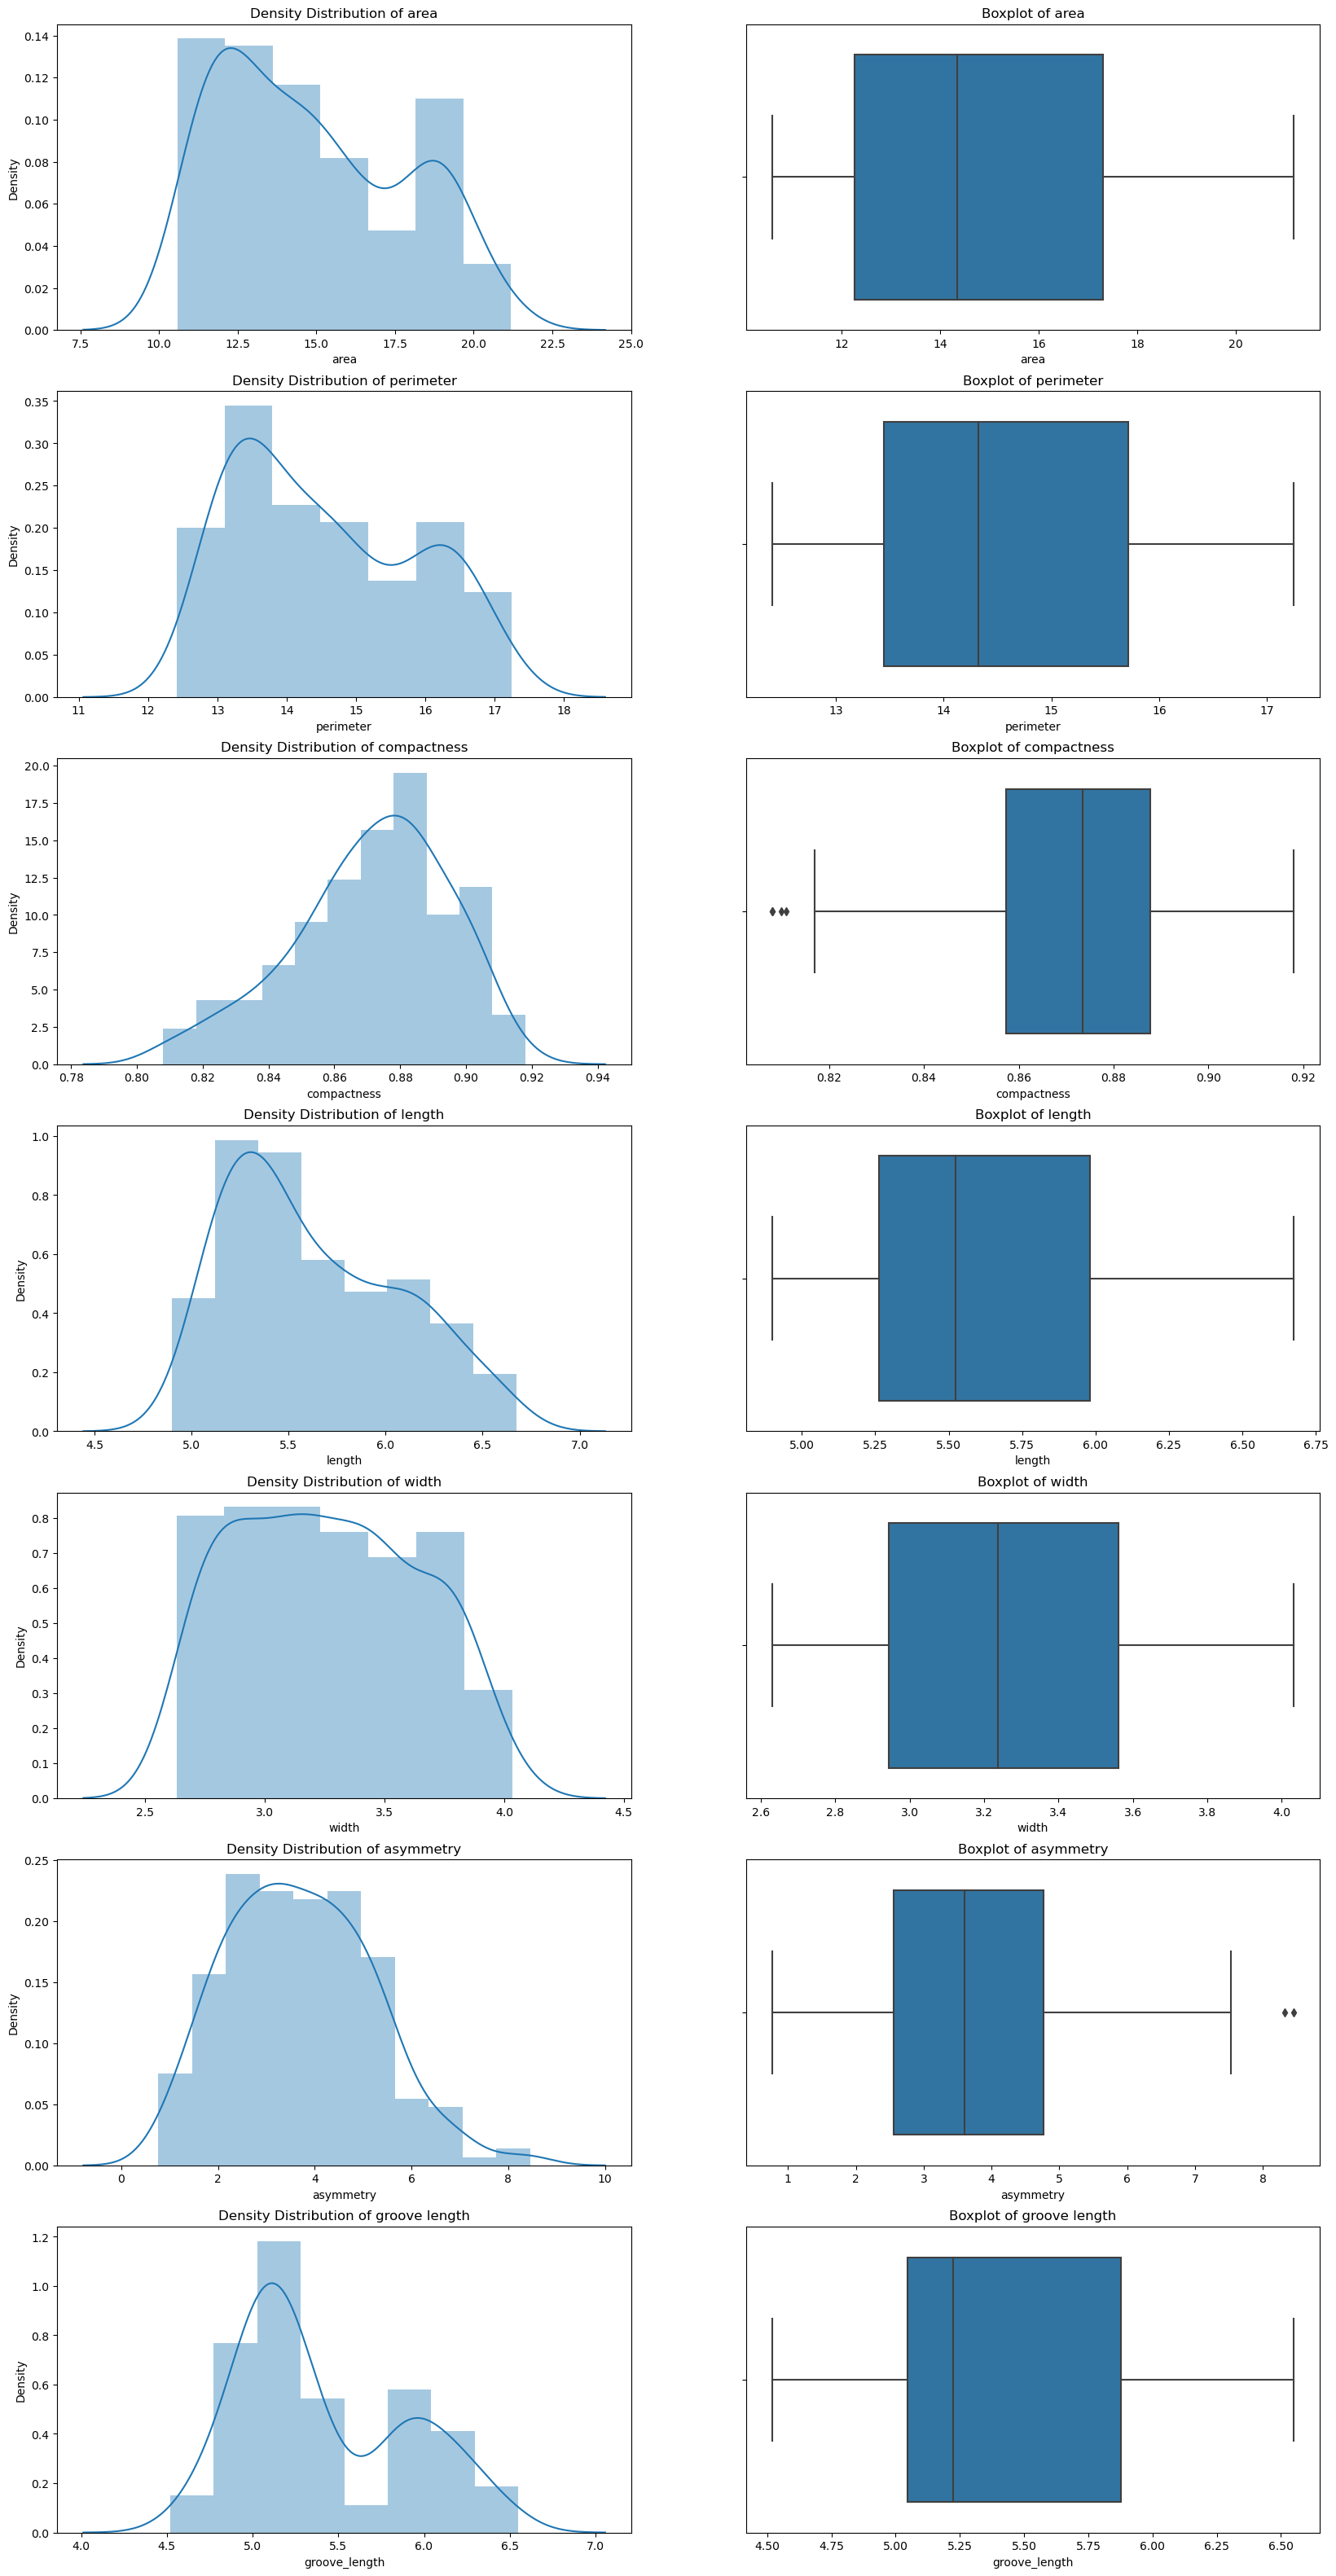

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
sns.distplot(seeds['area'])
plt.title('Density Distribution of area')

plt.subplot(7,2,2)
sns.boxplot(seeds['area'])
plt.title('Boxplot of area')

plt.subplot(7,2,3)
sns.distplot(seeds['perimeter'])
plt.title('Density Distribution of perimeter')

plt.subplot(7,2,4)
sns.boxplot(seeds['perimeter'])
plt.title('Boxplot of perimeter')

plt.subplot(7,2,5)
sns.distplot(seeds['compactness'])
plt.title('Density Distribution of compactness')

plt.subplot(7,2,6)
sns.boxplot(seeds['compactness'])
plt.title('Boxplot of compactness')

plt.subplot(7,2,7)
sns.distplot(seeds['length'])
plt.title('Density Distribution of length')

plt.subplot(7,2,8)
sns.boxplot(seeds['length'])
plt.title('Boxplot of length')

plt.subplot(7,2,9)
sns.distplot(seeds['width'])
plt.title('Density Distribution of width')

plt.subplot(7,2,10)
sns.boxplot(seeds['width'])
plt.title('Boxplot of width')

plt.subplot(7,2,11)
sns.distplot(seeds['asymmetry'])
plt.title('Density Distribution of asymmetry')

plt.subplot(7,2,12)
sns.boxplot(seeds['asymmetry'])
plt.title('Boxplot of asymmetry')

plt.subplot(7,2,13)
sns.distplot(seeds['groove_length'])
plt.title('Density Distribution of groove length')

plt.subplot(7,2,14)
sns.boxplot(seeds['groove_length'])
plt.title('Boxplot of groove length')

###### According to the above plots, it is evident that the feature asymmetry and compactness have outliners. Hence, it is necessary to deal with them before moving forward with any other task.

In [ ]:
# checking for the records having outliners in asymmetry
seeds[seeds['asymmetry']>=8]

,area,perimeter,compactness,length,width,asymmetry,groove_length
203,12.7,13.41,0.887,5.183,3.091,8.456,5.000
207,13.2,13.66,0.888,5.236,3.232,8.315,5.056


###### As there are only two records with outliners, dropping these entries will not create much difference in the size of data hence, dropping the records with outliners

In [ ]:
# deleting the records with values of asymmetry greater or equal to 8
seeds.drop(seeds[seeds['asymmetry']>= 8].index,inplace = True)

In [ ]:
# checking for the records having outliners in asymmetry
seeds[seeds['compactness']<0.82]

,area,perimeter,compactness,length,width,asymmetry,groove_length
145,11.21,13.13,0.817,5.279,2.687,6.169,5.275
149,10.79,12.93,0.811,5.317,2.648,5.462,5.194
157,12.13,13.73,0.808,5.394,2.745,4.825,5.220
158,11.75,13.52,0.808,5.444,2.678,4.378,5.310
170,11.02,13.00,0.819,5.325,2.701,6.735,5.163
174,10.83,12.96,0.810,5.278,2.641,5.182,5.185


###### As there are only five records with outliners, dropping these entries will not create much difference in the size of data hence, dropping the records with outliners

In [ ]:
# deleting the records with values of compactness less than 0.82
seeds.drop(seeds[seeds['compactness']<0.82].index,inplace = True)

In [ ]:
# structure of dataset after manipulation
seeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           202 non-null    float64
 1   perimeter      202 non-null    float64
 2   compactness    202 non-null    float64
 3   length         202 non-null    float64
 4   width          202 non-null    float64
 5   asymmetry      202 non-null    float64
 6   groove_length  202 non-null    float64
dtypes: float64(7)
memory usage: 12.6 KB


###### There were 210 entries in original dataset which reduced to 208 after droping the records with outliners

<hr style="border:1px solid black"> </hr>

### 3. Analyzing the relationship between attributes

In [ ]:
# statastical analysis of data
seeds.describe()

,area,perimeter,compactness,length,width,asymmetry,groove_length
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,14.972030,14.609455,0.872584,5.641267,3.276653,3.601584,5.417287
std,2.892385,1.305105,0.021673,0.446764,0.371431,1.418212,0.498548
min,10.590000,12.410000,0.820000,4.899000,2.630000,0.765000,4.519000
25%,12.395000,13.470000,0.858250,5.262250,2.967000,2.472500,5.044250
50%,14.475000,14.400000,0.874500,5.549500,3.263500,3.532000,5.229500
75%,17.502500,15.827500,0.888000,6.004000,3.565250,4.673750,5.879000
max,21.180000,17.250000,0.918000,6.675000,4.033000,7.524000,6.550000


- **Count**: total number of values in the attribute
- **Mean**: the average of all the values
- **STD**: standard deviation is a measure that is used to quantify the amount of variation or dispersion of a set of data values
- **Min**: the min value in the attribute
- **25%**: the set of data points between the minimum value and the first quartile
- **50**: the set of data points between the lower quartile and the median
- **75%**: the set of data between the median and the upper quartile
- **Min**: the max value in the attribute

In [ ]:
# to show plot on notebook
%matplotlib inline

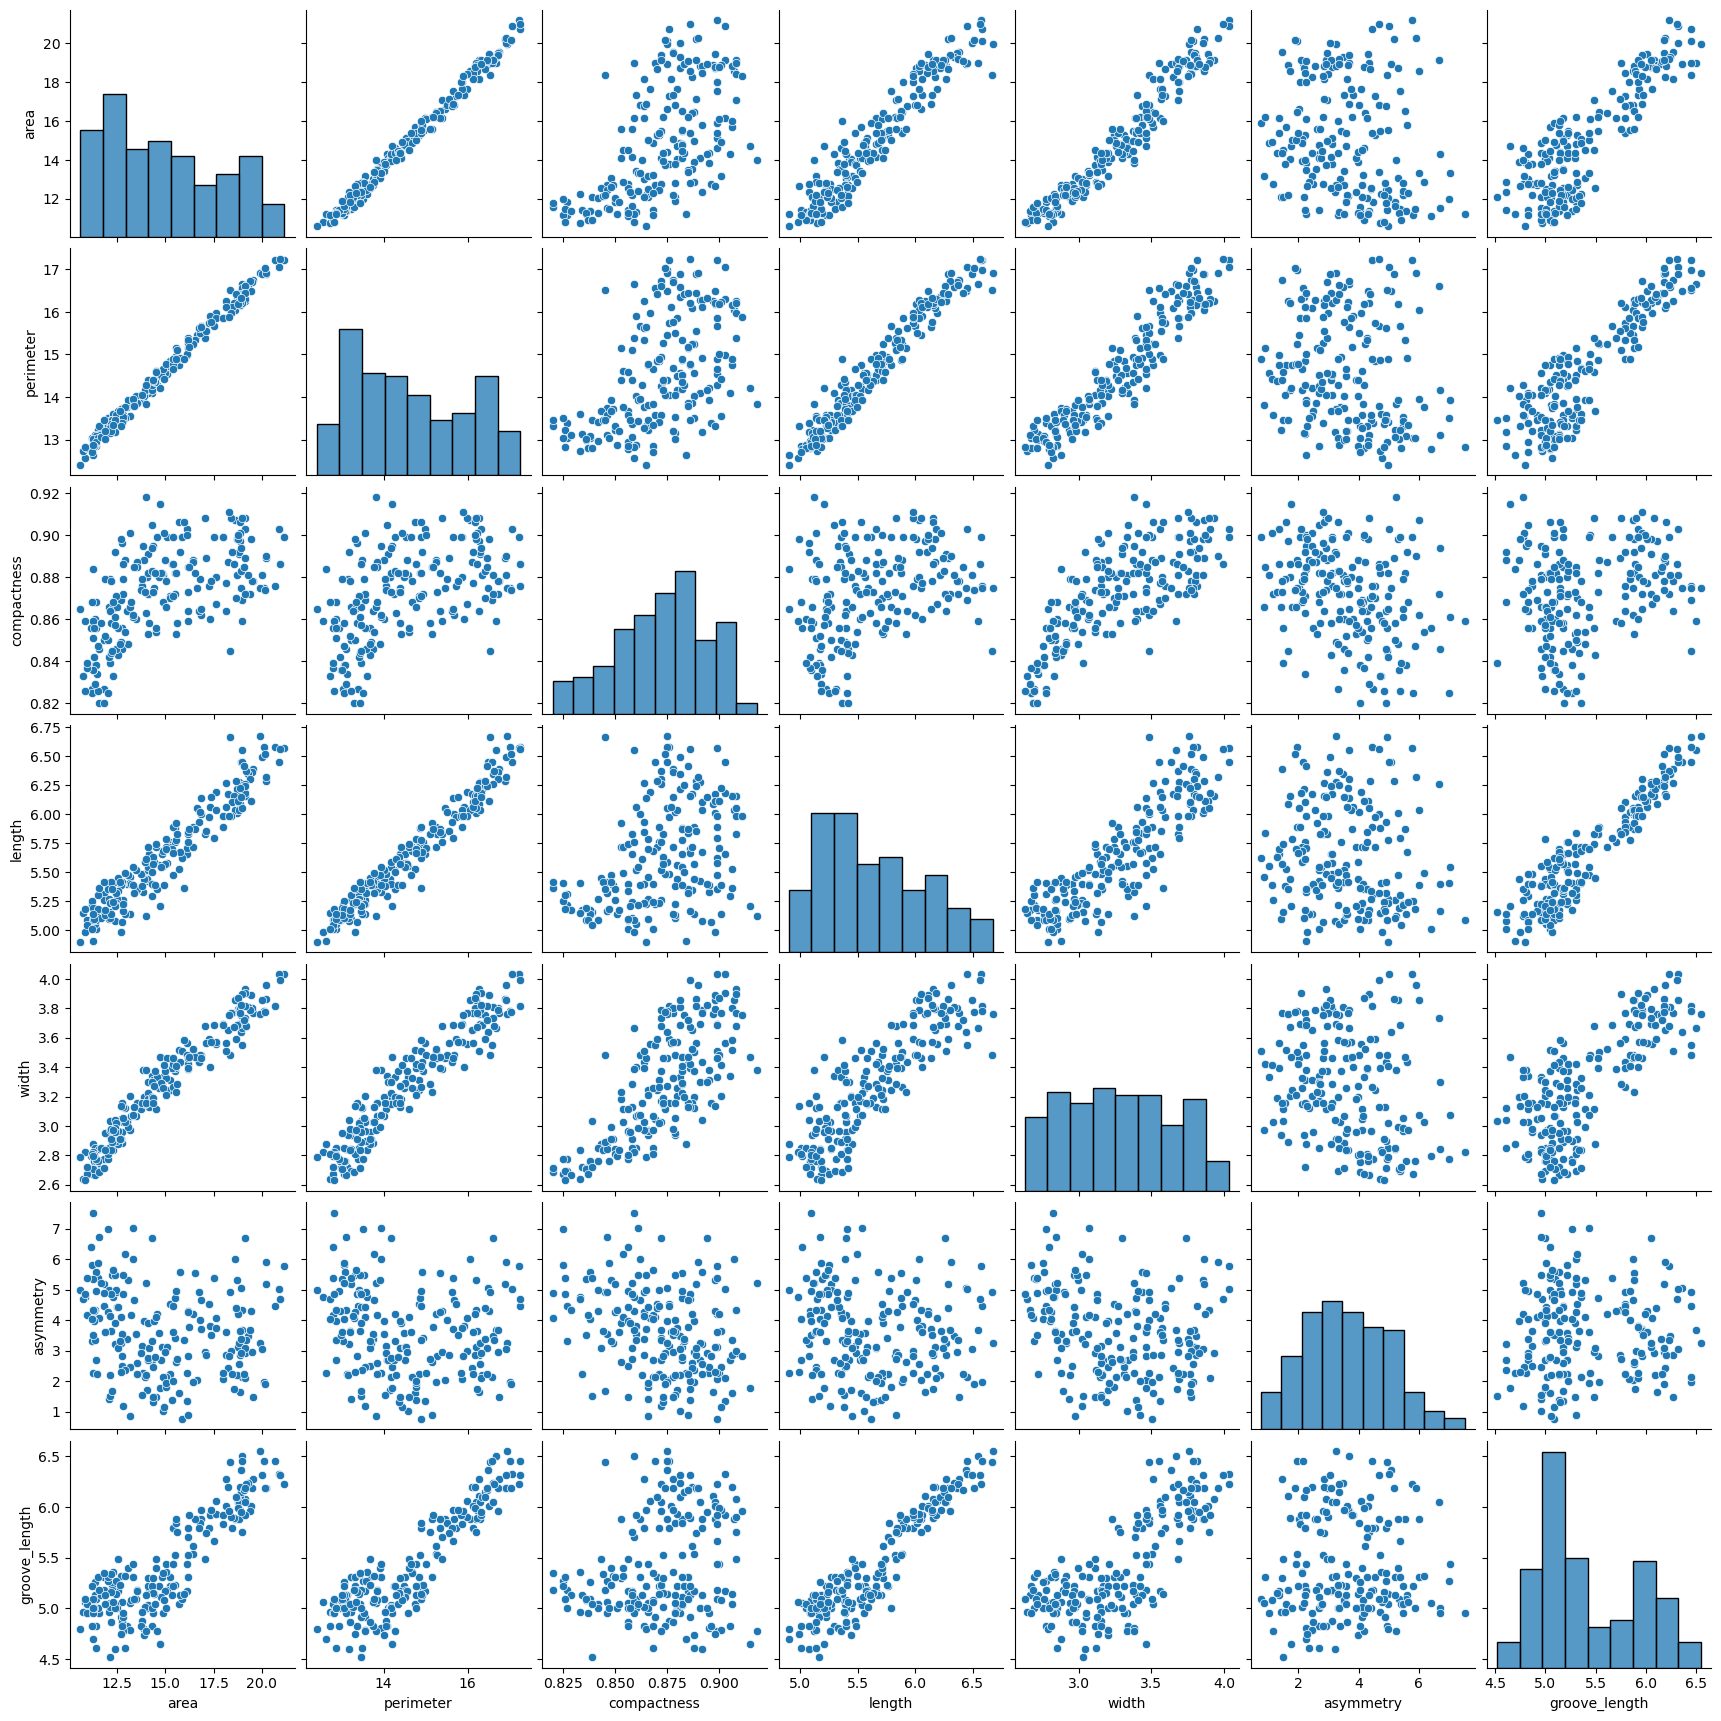

In [ ]:
# plotting pairwise relationship between the features
sns.pairplot(seeds)

In [ ]:
# finding correlation between features
cor=seeds.corr()
print("Correlation Matrix:")
cor

Correlation Matrix:


,area,perimeter,compactness,length,width,asymmetry,groove_length
area,1.000000,0.994806,0.596081,0.953761,0.971387,-0.182849,0.871006
perimeter,0.994806,1.000000,0.520574,0.974214,0.947387,-0.170524,0.895240
compactness,0.596081,0.520574,1.000000,0.366958,0.750168,-0.321791,0.228789
length,0.953761,0.974214,0.366958,1.000000,0.868233,-0.129256,0.933259
width,0.971387,0.947387,0.750168,0.868233,1.000000,-0.219894,0.760849
asymmetry,-0.182849,-0.170524,-0.321791,-0.129256,-0.219894,1.000000,0.028821
groove_length,0.871006,0.895240,0.228789,0.933259,0.760849,0.028821,1.000000


(8.0, 0.0)

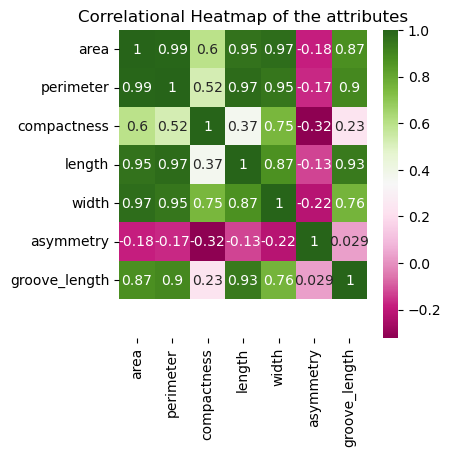

In [ ]:
# creating heatmap using correlation matrix
plt.figure(figsize=(4,4))
a=sns.heatmap(cor,cmap='PiYG',annot= True)
plt.title("Correlational Heatmap of the attributes")
plt.ylim(8.0,0.0)

###### According to the above plots, the most correlated features are area and perimeter followed by length and width.

<hr style="border:2px solid black"> </hr>

## Data Preprocessing
Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance, this is an essential step.

The following preprocessing is required for the assigned task:
- Feature Scaling
- Principle Component Analysis (PCA)

The above processes are required to be done in the mentioned order as it is necessary to normalize the data before performing PCA as PCA calculates a new projection of your data set. And the new axis are based on the standard deviation of your variables.

<hr style="border:2px solid black"> </hr>

### 1. Feature Scaling

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.


<hr style="border:1px solid black"> </hr>

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler() takes each characteristic is into account and first subtracts its mean from each value before dividing it by its standard deviation.
scaler = StandardScaler()

In [ ]:
# creating a new dataframe with normalized features
scaled_seeds= pd.DataFrame(scaler.fit_transform(seeds[['area','perimeter','compactness','length','width','asymmetry','groove_length']]))


In [ ]:
# viewing the new data
scaled_seeds

,0,1,2,3,4,5,6
0,0.099809,0.177087,-0.073274,0.273154,0.095399,-0.975887,-0.396706
1,-0.031897,-0.030307,0.389267,-0.195817,0.152078,-1.826245,-0.927560
2,-0.236388,-0.399007,1.499366,-0.785958,0.162874,-0.638005,-1.190975
3,-0.392355,-0.514226,1.036825,-0.711910,0.276231,-0.949026,-1.231192
4,0.404812,0.292306,1.406858,0.037546,0.770143,-1.588032,-0.487193
...,...,...,...,...,...,...,...
197,-0.901849,-0.875245,-0.720832,-0.981176,-0.854640,0.224370,-0.837073
198,-0.964236,-1.082639,0.250505,-1.131516,-0.797961,0.020793,-1.100489
199,-1.296966,-1.328439,-0.998356,-1.124784,-1.299971,0.511357,-0.833052
200,-1.085544,-1.074958,-0.952102,-1.046248,-1.189313,-0.002534,-0.750609


###### Renaming the features is necessary since the labels on the new dataset are not well specified.

In [ ]:
scaled_seeds.columns = ['Area_T','Perimeter_T','Compactness_T','Length_T','Width_T','Asymmetry_T','Groove_length_T']

In [ ]:
# viewing the new data with renamed columns
scaled_seeds

,Area_T,Perimeter_T,Compactness_T,Length_T,Width_T,Asymmetry_T,Groove_length_T
0,0.099809,0.177087,-0.073274,0.273154,0.095399,-0.975887,-0.396706
1,-0.031897,-0.030307,0.389267,-0.195817,0.152078,-1.826245,-0.927560
2,-0.236388,-0.399007,1.499366,-0.785958,0.162874,-0.638005,-1.190975
3,-0.392355,-0.514226,1.036825,-0.711910,0.276231,-0.949026,-1.231192
4,0.404812,0.292306,1.406858,0.037546,0.770143,-1.588032,-0.487193
...,...,...,...,...,...,...,...
197,-0.901849,-0.875245,-0.720832,-0.981176,-0.854640,0.224370,-0.837073
198,-0.964236,-1.082639,0.250505,-1.131516,-0.797961,0.020793,-1.100489
199,-1.296966,-1.328439,-0.998356,-1.124784,-1.299971,0.511357,-0.833052
200,-1.085544,-1.074958,-0.952102,-1.046248,-1.189313,-0.002534,-0.750609


In [ ]:
# structure of the transformed dataset
seeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           202 non-null    float64
 1   perimeter      202 non-null    float64
 2   compactness    202 non-null    float64
 3   length         202 non-null    float64
 4   width          202 non-null    float64
 5   asymmetry      202 non-null    float64
 6   groove_length  202 non-null    float64
dtypes: float64(7)
memory usage: 12.6 KB


<hr style="border:1px solid black"> </hr>

### 2. PCA
Principal component analysis (PCA) is a technique that transforms high-dimensions data into lower-dimensions while retaining as much information as possible

It is a good practice to apply PCA before a clustering algorithm as it improves the clustering results by noise reduction.

<hr style="border:1px solid black"> </hr>

In [ ]:
# applying PCA function on the data
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_seeds = pd.DataFrame(pca.fit_transform(scaled_seeds))

In [ ]:
pca_seeds.columns=['PCA 1','PCA 2']
pca_seeds

,PCA 1,PCA 2
0,0.198548,0.762496
1,-0.126721,1.934266
2,-0.540555,1.887390
3,-0.692583,1.897882
4,1.005412,2.131466
...,...,...
197,-2.122807,-0.071241
198,-2.099868,0.737152
199,-2.855262,-0.409502
200,-2.473594,-0.063877


<hr style="border:2px solid black"> </hr>

## Clustering Techniques

Clustering is a type of unsupervised learning where the data set is divided into a certain number of clusters in such a manner that the data points belonging to a cluster have similar characteristics.


<hr style="border:2px solid black"> </hr>

### 1. K-Means Clustering

K-means clustering is a method of vector quantization, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

<hr style="border:1px solid black"> </hr>

In [ ]:
# importing library for kmeans clustering
from sklearn.cluster import KMeans


In [ ]:
# creating a copy of dataset for K-Means algorithm
seeds_kmeans=pca_seeds.copy(deep=True)
seeds_kmeans.head()

,PCA 1,PCA 2
0,0.198548,0.762496
1,-0.126721,1.934266
2,-0.540555,1.887390
3,-0.692583,1.897882
4,1.005412,2.131466


#### Identifying optimum value of K i.e, optimum number of clusters using Elbow Plot

The k means model is fitted to a range of various k values (usually from 1 to 10 or 20, depending on your data), and the SSE for each cluster is then plotted to create the elbow plot. The "elbow" or "knee" in the plot, which is where the inflection point occurs, is a reliable indicator of the ideal k value to employ in the model to achieve the best fit.

In [ ]:
# creating a function to identify optimum value of K by generating elbow plot

def optim_K(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #generating elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters $(k)$')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

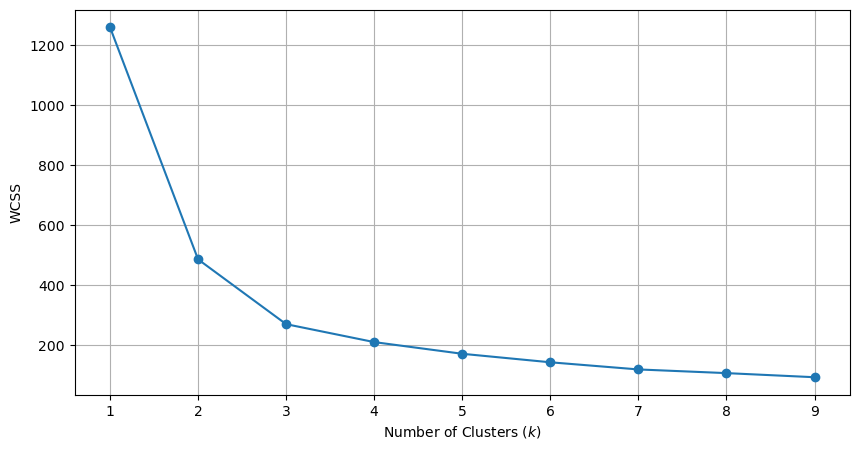

In [ ]:
# calling function to identify optimum value of K for seeds dataset
optim_K(seeds_kmeans[['PCA 1','PCA 2']], 10)

###### Therefore, by observing the elbow plot, the decent of the slope reduces after k=3 indicating the optimal value of K is 3.

In [ ]:
# applying kmeans clustering technique with scaled features and k = 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(seeds_kmeans[['PCA 1','PCA 2']])

KMeans(n_clusters=3)

In [ ]:
# appending predicted group labels to the dataset
seeds_kmeans['Group_Labels for k=3'] = kmeans.labels_

In [ ]:
seeds_kmeans.head()

,PCA 1,PCA 2,Group_Labels for k=3
0,0.198548,0.762496,1
1,-0.126721,1.934266,1
2,-0.540555,1.887390,1
3,-0.692583,1.897882,1
4,1.005412,2.131466,1


###### The column "Group_Labels for k=3" consits of the assigned cluster number by K-means algorithm

In [ ]:
# analysing distribution of records
seeds_kmeans['Group_Labels for k=3'].value_counts()

0    68
1    67
2    67
Name: Group_Labels for k=3, dtype: int64

Text(0.5, 1.0, 'K-means, k=3')

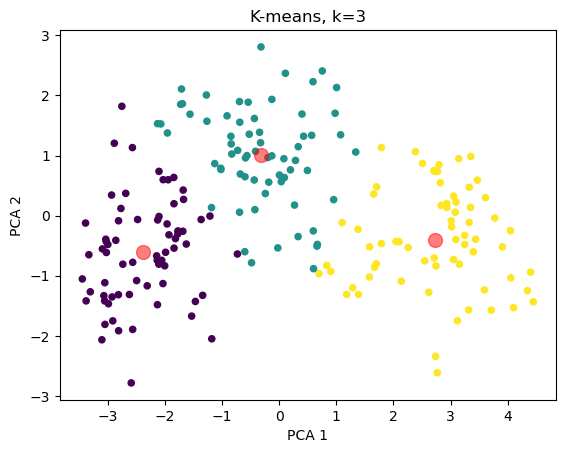

In [ ]:
# plotting the clusters predicted by the k-means algorithm, with centers for k = 3
plt.scatter(x='PCA 1', y='PCA 2', data=seeds_kmeans,c=seeds_kmeans['Group_Labels for k=3'], s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means, k=3')

###### Calculating Silhoutte Score for model evaluation
Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other.

Silhouette score, S, for each sample is calculated using the following formula:

\(S = frac{(b - a)}/{max(a, b)}\)

In [ ]:
# importing libraries to calculate silhouette score
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

score_kmeans = silhouette_score(seeds_kmeans,kmeans.labels_)
print("Silhoutte score: {:.3f}".format(score_kmeans))

Silhoutte score: 0.526


In [ ]:
# creating a data frame to store the values of silhouette score of the clustering algorithms deployed
Silhouette_score=pd.DataFrame({'Clustering Method':[],'Silhouette Score':[]})
Silhouette_score

,Clustering Method,Silhouette Score


In [ ]:
# storing the value of silhouette score for K-means
Silhouette_score.loc[0]=['K-Means Algorithm',score_kmeans]
Silhouette_score

,Clustering Method,Silhouette Score
0,K-Means Algorithm,0.525614


In [ ]:
# importing all functionalities from clustering_utils for further visualisations
from clustering_utils import *

##### Comparing values for different values of K by plotting the results as a scatter plot

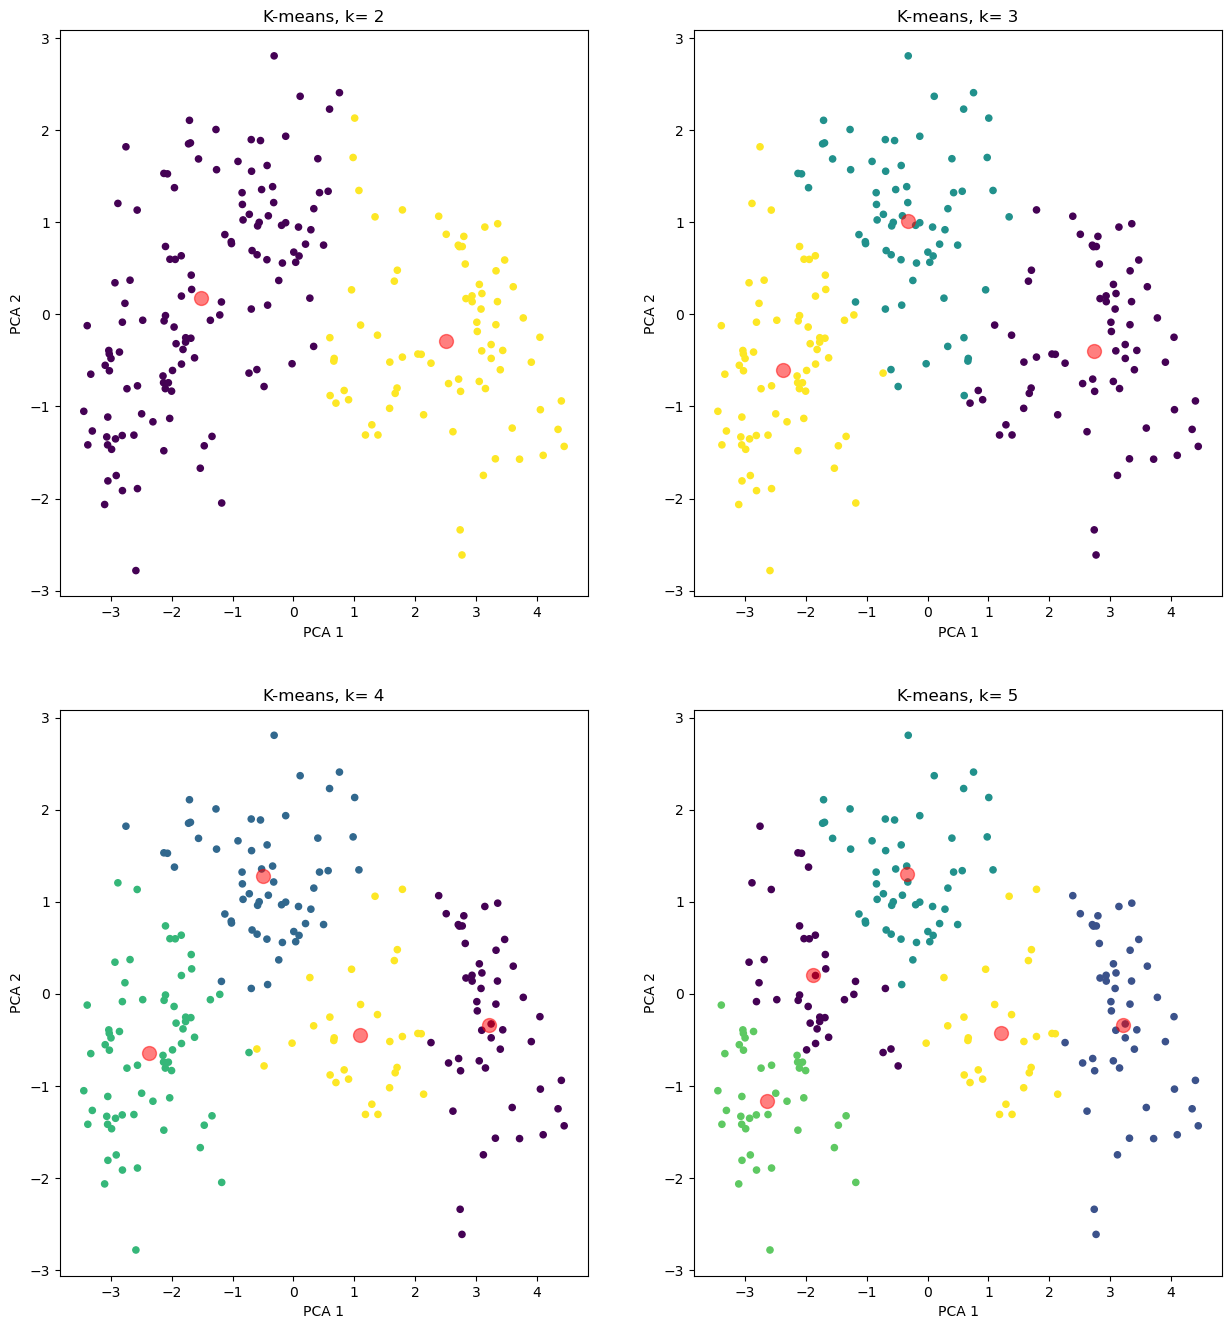

In [ ]:
# applying k-means alogrithm on the data set considering the value sof k as 2,3,4 & 5
plt.figure(figsize=(15,25))
for i in range (2,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(seeds_kmeans[['PCA 1','PCA 2']])
    seeds_kmeans[f'Group_Labels for k={i}'] = kmeans.labels_
# plotting the clusters predicted by the k-means algorithm, with centers
    plt.subplot(3,2,i-1)
    plt.scatter(x='PCA 1', y='PCA 2', data=seeds_kmeans,c=seeds_kmeans[f'Group_Labels for k={i}'], s=20, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f'K-means, k= {i}')


###### Plotting Silhoutte Score for different values of K

In [ ]:
# list to store the silhouette metric value given different K values
Scores_Kmean = []

# range of the different values of K to analyse
# this cannot be run for n=1.
K = range(2, 20)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_seeds)
    Scores_Kmean.append(silhouette_score(seeds_kmeans, kmeans.labels_))

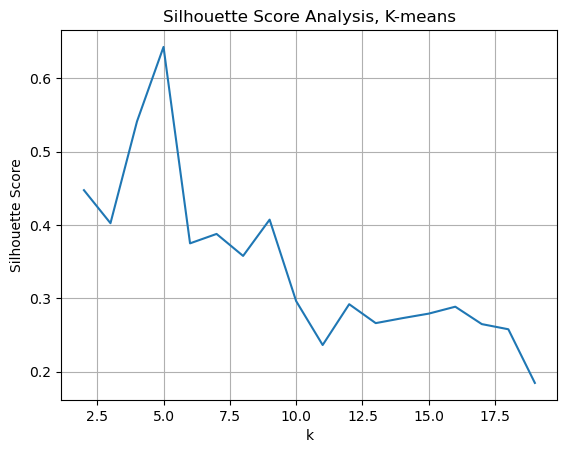

In [ ]:
# plotting the values of the metric
plt.plot(K, Scores_Kmean)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis, K-means')
plt.grid(True)


<hr style="border:1px solid black"> </hr>

### 2. GMM Clustering

One of the problems with k-means is that the data needs to follow a circular format. The way k-means calculates the distance between data points has to do with a circular path, so non-circular data isn't clustered correctly.

The Gaussian mixture model uses multiple Gaussian distributions to fit arbitrarily shaped data.

There are several single Gaussian models that act as hidden layers in this hybrid model. So the model calculates the probability that a data point belongs to a specific Gaussian distribution and that's the cluster it will fall under.

<hr style="border:1px solid black"> </hr>

In [ ]:
# dataset consisting values after performing PCA
pca_seeds

,PCA 1,PCA 2
0,0.198548,0.762496
1,-0.126721,1.934266
2,-0.540555,1.887390
3,-0.692583,1.897882
4,1.005412,2.131466
...,...,...
197,-2.122807,-0.071241
198,-2.099868,0.737152
199,-2.855262,-0.409502
200,-2.473594,-0.063877


In [ ]:
# importing library needed for training the gmm clustering algorithm
from sklearn.mixture import GaussianMixture as GMM

# applying gmm clustering technique with no. of components equal to 3
gmm_seeds = GMM(n_components=3, n_init=20, random_state=300)
gmm_seeds.fit(pca_seeds[['PCA 1','PCA 2']])
y_gmm_seeds = gmm_seeds.predict(pca_seeds[['PCA 1', 'PCA 2']])

Text(0.5, 1.0, 'GMM, n=3')

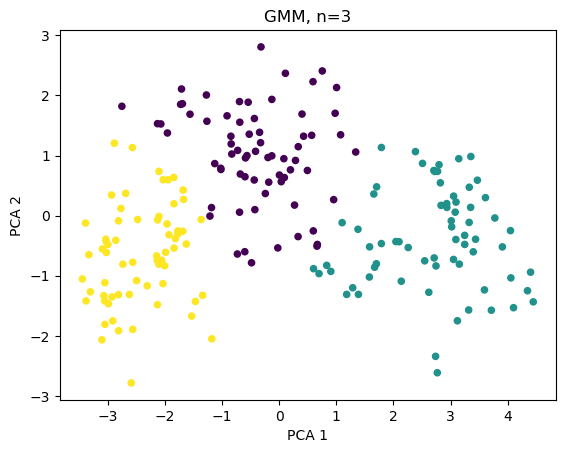

In [ ]:
# create a plot to visualise the GMM result

plt.scatter(x='PCA 1', y='PCA 2', data=pca_seeds, c=y_gmm_seeds, s=20, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('GMM, n=3')

In [ ]:
# calculating silhouette score for GMM clustering for n= 3 components
score_gmm= (silhouette_score(pca_seeds, y_gmm_seeds))
score_gmm

0.49018641787345746

In [ ]:
# storing the value of silhouette score for gmm
Silhouette_score.loc[1]=['GMM Algorithm',score_gmm]
Silhouette_score

,Clustering Method,Silhouette Score
0,K-Means Algorithm,0.525614
1,GMM Algorithm,0.490186


###### Evaluating GMM model using AIC & BIC measure

- **AIC (Akaike Information Criteria)**: An evaluation of a continual and corresponding interval among the undetermined, accurate, and justified probability of the facts
- **BIC (Bayesian Information Criteria)**: Under a particular Bayesian structure, an accurate evaluation of the purpose of the possibility following the model

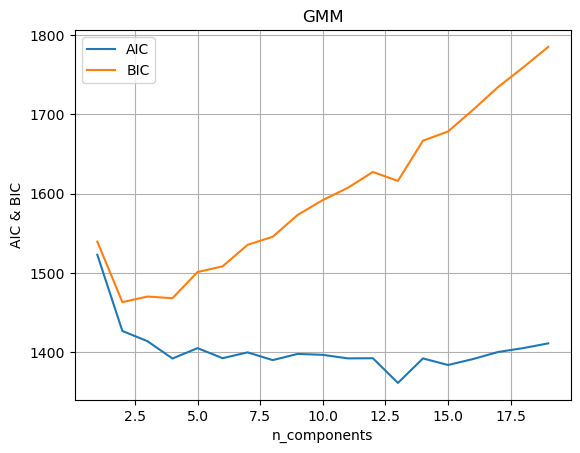

In [ ]:
# Plot AIC and BIC values for the GMM.

n_components = range(1, 20)

models = [GMM(n, covariance_type='full', random_state=0).fit(pca_seeds[['PCA 1','PCA 2']])
          for n in n_components]

plt.plot(n_components, [m.aic(pca_seeds[['PCA 1','PCA 2']])
         for m in models], label='AIC')
plt.plot(n_components, [m.bic(pca_seeds[['PCA 1','PCA 2']])
         for m in models], label='BIC')
plt.title('GMM')
plt.annotate('(3, -2250)', xy=(3, -2250), xytext=(5, -2250),arrowprops=dict(facecolor='black'))
plt.annotate('(3, -1930)', xy=(3, -1930), xytext=(5, -1930),arrowprops=dict(facecolor='black'))
plt.grid(True)
plt.ylabel('AIC & BIC')
plt.xlabel('n_components')
plt.legend()


###### User must try to minimize the values of AIC & BIC for the best performing model

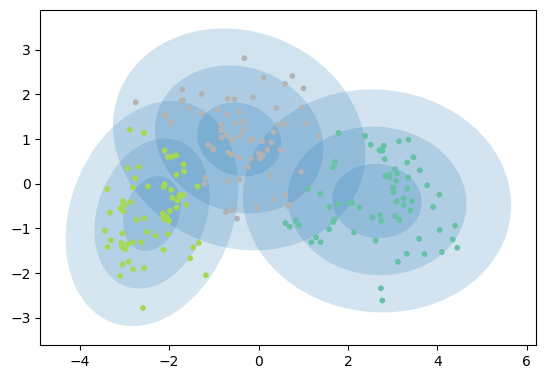

In [ ]:
# Demonstrate more plotting options
gmm = GMM(n_components=3, n_init=20, random_state=42)
plt.gca().set_aspect('equal')
plot_gmm(gmm, pca_seeds.loc[:,['PCA 1','PCA 2']].values)


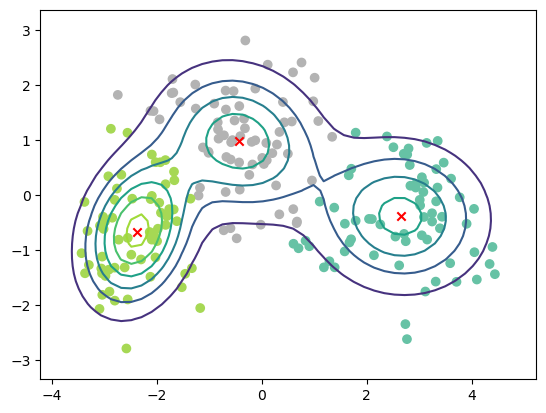

In [ ]:
# from clustering_utils import generate_2d_gmm

generate_2d_gmm(gmm, pca_seeds.loc[:,['PCA 1','PCA 2']].values, style=None)

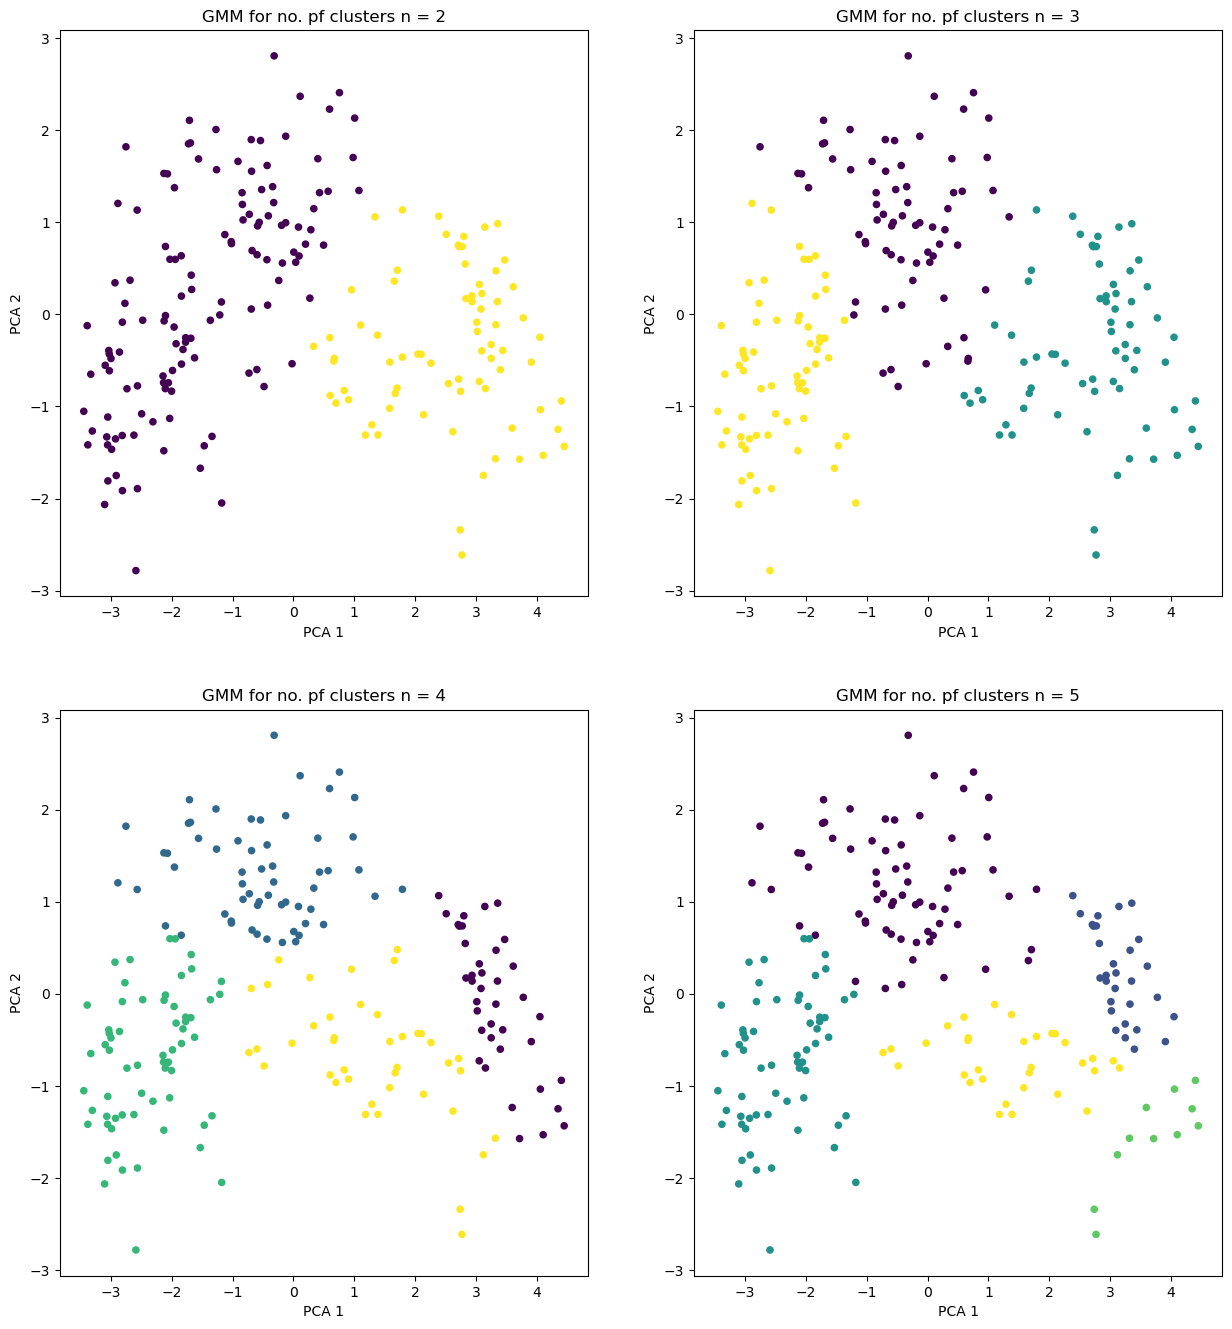

In [ ]:
# applying gmm alogrithm on the data set considering the number of components as 2,3,4 & 5
plt.figure(figsize=(15,25))
for i in range (2,6):
    gmm_seeds = GMM(n_components=i, n_init=20, random_state=300)
    gmm_seeds.fit(pca_seeds[['PCA 1','PCA 2']])
    y_gmm_seeds = gmm_seeds.predict(pca_seeds[['PCA 1', 'PCA 2']])# plotting the clusters predicted by the k-means algorithm, with centers
    plt.subplot(3,2,i-1)

    plt.scatter(x='PCA 1', y='PCA 2', data=pca_seeds, c=y_gmm_seeds, s=20, cmap='viridis')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f'GMM for no. pf clusters n = {i}')


###### Plotting Silhoutte Score for different number of components (n) for gmm

In [ ]:
# list to store the silhouette metric value given different no of components
Scores_GMM = []

# range of the different values of K to analyse
# this cannot be run for n=1.
K = range(2, 20)
for k in K:
    gmm_seeds = GMM(n_components=k, n_init=20, random_state=300)
    gmm_seeds.fit(pca_seeds[['PCA 1','PCA 2']])
    y_gmm_seeds = gmm_seeds.predict(pca_seeds[['PCA 1', 'PCA 2']])
    Scores_GMM.append(silhouette_score(pca_seeds, y_gmm_seeds))

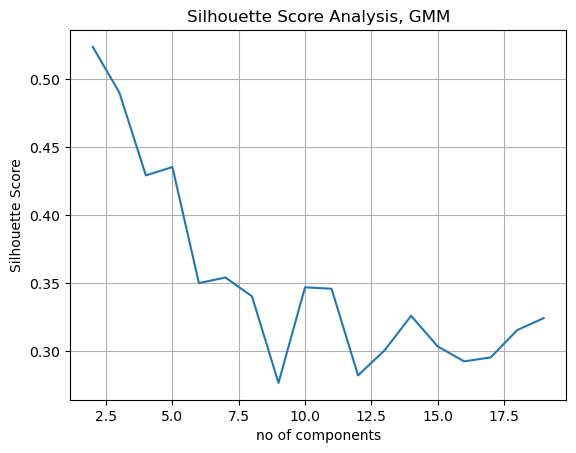

In [ ]:
# plotting the values of the metric
plt.plot(K, Scores_GMM)
plt.xlabel('no of components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis, GMM')
plt.grid(True)

<hr style="border:1px solid black"> </hr>

### 3. DB SCAN Clustring
DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).

The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster. The essential parameters for this algorithm are:
- **eps**: The distance that specifies the neighborhoods.
- **minPts**: Minimum number of data points to define a cluster.

<hr style="border:1px solid black"> </hr>

In [ ]:
# importing libraries essential for DB Scan clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

###### Utilising elbow plot to find the optimum value of esp for DB Scan clustering algorithm

169 0.5792516934858346


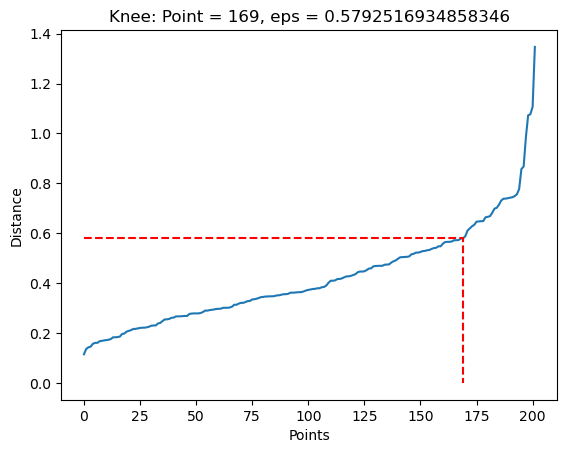

In [ ]:
min_samples = 5
# initialise and fit NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_seeds)

# find the K-neighbors of our points.
distances, indices = neighbors.kneighbors(pca_seeds, n_neighbors = min_samples)
distances = np.sort(distances[:,-1], axis=0) # isolate last position (k=min_samples) and sort

# find the point of maximum curvature
knee = elbow_point(distances)
print(knee, distances[knee])

# save new epsilon
eps_new = distances[knee]

plt.plot(distances)
plt.plot([0,knee,knee], [eps_new, eps_new, 0], color='r', linestyle='--')
plt.title(f'Knee: Point = {knee}, eps = {distances[knee]}')
plt.xlabel("Points")
plt.ylabel("Distance");


###### From the above elbow plot, the optimum value of eps is almost 0.6

In [ ]:
# applying DB Scan clustering technique with eps = 0.5987
eps = 0.6
min_samples = 7

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(pca_seeds)
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

###### 0, 1, 2 are the clusters predicted by the algorithm while the value -1 depicts the outliners

In [ ]:
# analysing estimated number of clusters and outliners
n_clusters = len(np.unique(labels[labels >= 0]) )
n_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: '  ,n_clusters)
print('Estimated no. of noise points: ' , n_noise)

Estimated no. of clusters:  3
Estimated no. of noise points:  22


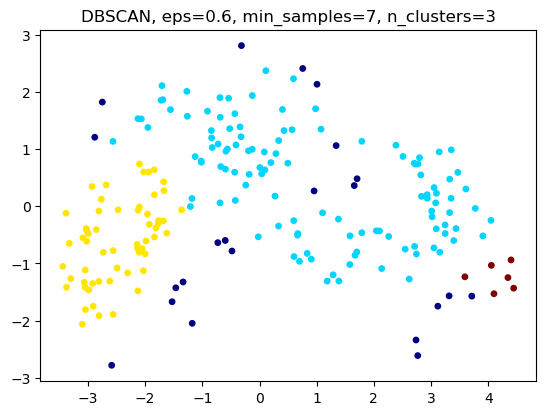

In [ ]:
# Plot the DBSCAN clusters data
plt.scatter(pca_seeds.iloc[:, 0], pca_seeds.iloc[:, 1], s=15, c=labels, cmap='jet')
plt.title(f'DBSCAN, eps={eps}, min_samples={min_samples}, n_clusters={max(labels)+1}')
plt.gca().set_aspect('equal')

In [ ]:
# calculating silhouette score for DB Scan algorithm
score_DbScan = silhouette_score(pca_seeds,labels)
print("Silhoutte score: {:.3f}".format(score_DbScan))

Silhoutte score: 0.156


In [ ]:
# storing the value of silhouette score for DB Scan
Silhouette_score.loc[2]=['DB Scan Algorithm',score_DbScan]
Silhouette_score

,Clustering Method,Silhouette Score
0,K-Means Algorithm,0.525614
1,GMM Algorithm,0.490186
2,DB Scan Algorithm,0.156007


<hr style="border:1px solid black">

### 4. Spectral Clustring
Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well.

Spectral clustering uses information from the eigenvalues (spectrum) of special matrices built from the graph or the data set.

<hr style="border:1px solid black">

In [ ]:
# importing libraries essential for DB Scan clustering
from sklearn.cluster import SpectralClustering

In [ ]:
# applying spectral clustering technique with no. of clusters as 3
spectral_cluster_model= SpectralClustering(
    n_clusters=3,
    random_state=25,
    n_neighbors=8,
    affinity='nearest_neighbors'
)

In [ ]:
# creating a copy of dataset for spectral algorithm
spectral_seeds=pca_seeds.copy()

In [ ]:
# printing the last 5 records of the dataset
spectral_seeds.tail()

,PCA 1,PCA 2
197,-2.122807,-0.071241
198,-2.099868,0.737152
199,-2.855262,-0.409502
200,-2.473594,-0.063877
201,-2.052432,-0.742682


In [ ]:
# appending predicted group labels to the dataset
spectral_seeds['cluster'] = spectral_cluster_model.fit_predict(spectral_seeds[['PCA 1','PCA 2']])

[Text(0.5, 1.0, 'Spectral Clustering')]

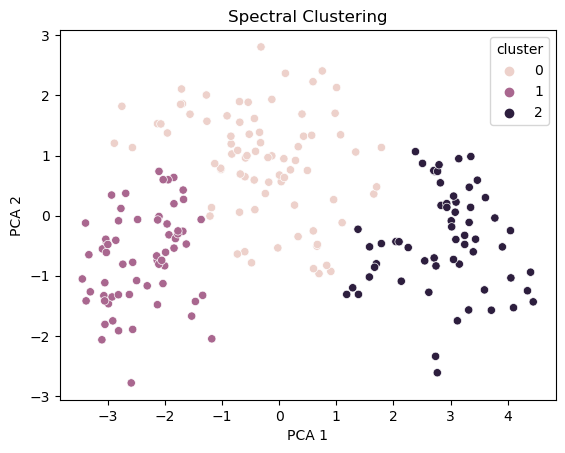

In [ ]:
# plotting the results
fig, ax = plt.subplots()
sns.scatterplot(x='PCA 1', y='PCA 2', data=spectral_seeds, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')

In [ ]:
# calculating the silhouette score for spectral clustering
score_spectral = silhouette_score(spectral_seeds,spectral_cluster_model.labels_)
print("Silhoutte score: {:.3f}".format(score_spectral))

Silhoutte score: 0.540


In [ ]:
# storing the value of silhouette score for spectral clustering
Silhouette_score.loc[3]=['Spectral Algorithm',score_spectral]
Silhouette_score

,Clustering Method,Silhouette Score
0,K-Means Algorithm,0.525614
1,GMM Algorithm,0.490186
2,DB Scan Algorithm,0.156007
3,Spectral Algorithm,0.540185


<hr style="border:2px solid black">

## Comparing the results of all clustering models deployed

The quality of each clustering method may be evaluated by evaluating the tightness of each cluster it generates as well as the separation of the clusters created by each algorithm. As a result, the silhouette scores for each algorithm are compared.

<hr style="border:2px solid black">

Text(0.5, 1.0, 'Comparison between Silhouette Scores of all deployed algorithms')

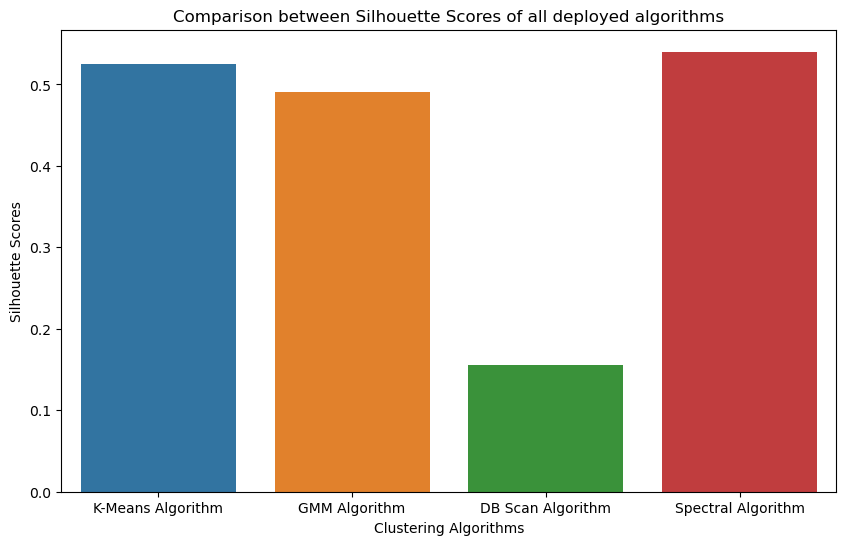

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
sns.barplot(x=Silhouette_score.iloc[:,0],y=Silhouette_score.iloc[:,1],data=Silhouette_score)
plt.xlabel("Clustering Algorithms")
plt.ylabel("Silhouette Scores")
plt.title("Comparison between Silhouette Scores of all deployed algorithms")

- **The comparison between Silhouette Scores of all the used clustering algorithm demonstrates that K-Means clustering performs the best among all the methods followed by spectral algorithm.**
- **GMM clustering method also performs well however, DB Scan being a density based technique, fails to cluster the data points efficiently.**


<hr style="border:2px solid black">

## Conclusion:
**K-Means clustering appears to be the most appropriate clustering method for this particular dataset, which has just over 200 entries,as it guarantees convergence, generalises to different sizes and shapes of clusters as it mainly focuses between the distances between datapoints thus it can easily adapt to new examples.**